In [1]:
import pandas as pd
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

In [2]:
# 열이름을 지정
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight',
              'acceleration', 'model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kp = 0.425)
mpg_to_kpl = 1.60934/3.78541
# mpg 열에 0.425를 곱한 결과를 새로운열(kpl)에 추가
df['kpl'] = (df['mpg'] * mpg_to_kpl).round(2)
df.kpl.head(3)

0    7.65
1    6.38
2    7.65
Name: kpl, dtype: float64

In [4]:
# 1. 데이터 타입확인 , unique(), '?' --> NaN 으로 처리
df_hp = df.copy() # .copy 를해야됨
df_hp.horsepower.replace('?', np.nan, inplace=True)
# 2. NaN 데이터 확인 후 --> 처리 --> 0.0값으로  치환
#df_hp['horsepower'].fillna('0.0', inplace=True)
df_hp.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행 삭제
# 3. 데이터 타입 변경 --> float으로 변경
df_hp['horsepower'] = df_hp['horsepower'].astype('float') #문자형을 실수형으로

NameError: name 'np' is not defined

In [5]:
# horsepower 칼럼에 대해서 순서대로 처리하세요
import numpy as np
df.horsepower.unique()
df_hp = df.copy() # .copy 를해야됨
df_hp.horsepower.replace('?',np.nan, inplace=True) # 쓰레기 값 처리

In [6]:
df_hp['horsepower'].fillna('0.0', inplace=True)
df_hp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [7]:
# category
print(df_hp['origin'].unique()) # 정수형 데이터를 문자로 변경
df_hp['origin'].replace({1:'USA', 2:'EU', 3:"JAPAN"}, inplace=True)
print(df_hp['origin'].unique())
print(df['origin'].dtypes)
df['origin'] = df['origin'].astype('category')
print(df[origin].dtypes)

[1 3 2]
['USA' 'JAPAN' 'EU']
int64


NameError: name 'origin' is not defined

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('./auto-mpg.csv', header=None)
# 열이름을 지정
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight',
              'acceleration', 'model year','origin','name']

In [9]:
# horsepower열의 누락 데이터 처리 ('?' 삭제 후 실수형으로 변경)
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [10]:
# 3개의 구간 (bin) 으로 나누어서 범위로 처리를 할려고 함
count, bin_div = np.histogram(df['horsepower'], bins=3)
print(bin_div)

bin_names = ['저출력', '보통출력', '고출력']

[ 46.         107.33333333 168.66666667 230.        ]


In [11]:
df['hp_bin'] = pd.cut(x = df['horsepower'], # 데이터 배열
                      bins = bin_div,  # 경계 리스크
                      labels = bin_names, # bin 이름
                      include_lowest = True
                     )
df[['horsepower','hp_bin']].head()


,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력


In [12]:
horsepower_dummies = pd.get_dummies(df['hp_bin'])
horsepower_dummies.head(10)
pd.get_dummies(df['hp_bin'], prefix='hp')

,hp_저출력,hp_보통출력,hp_고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [13]:
from sklearn import preprocessing

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder() #label encoer 생성
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled)
print(type(onehot_labeled))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>


In [14]:
# 2차원 행렬로 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1)
print(onehot_reshaped)
print(type(onehot_reshaped))

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>


In [15]:
# 최소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


In [16]:
#'age' 컬럼으로 데이터 처리 bin을 4로 ['유아기','청소년','청년','장년']
import seaborn as sns
df = sns.load_dataset("titanic")

In [48]:
df['age'].isnull().sum(axis=0) # Nan 데이터를 처리 평균 나이로 대체
age_avg = df['age'].sum() / df['age'].count()

df['age'].fillna(value = age_avg, axis=0, inplace=True)
df['age'] = df['age'].round().astype('int')

In [49]:
bin_names = ['유아기','청소년','청년','장년']
bin_values = [0,20,40,60,100]

df['age_bin'] = pd.cut(x = df['age'], # 데이터 배열
                      bins = bin_values,  # 경계 리스크
                      labels = bin_names, # bin 이름
                      include_lowest = True
                      )
df[['age','age_bin']].head(10)
pd.get_dummies(df['age_bin'], prefix="대")

,대_유아기,대_청소년,대_청년,대_장년
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
886,0,1,0,0
887,1,0,0,0
888,0,1,0,0
889,0,1,0,0


In [19]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data # data, target, target_names( 인덱스명 ) , feture_names(컬럼의 이름)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
# numpy 대하여
import numpy as np

In [21]:
arr = np.arange(24)
print(arr, type(arr),"\n", arr.shape,"\n", arr.size,":", arr.dtype)

arr = arr.reshape(3,4,2)
# print(arr, type(arr),"\n", arr.shape,"\n", arr.size,":", arr.dtype)
arr.ndim
print(arr) #맨처음이 0축 기분으로
arr.sum(axis=2)
print(arr.dtype.name, arr.dtype.itemsize)

a = np.arange(-5,5,0.5)
a

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] <class 'numpy.ndarray'> 
 (24,) 
 24 : int32
[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]
int32 4


array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [22]:
a_list = [1.0,2.0,3.0]
print(type(a_list))
arr_list = np.array(a_list)
type(arr_list)

<class 'list'>


numpy.ndarray

In [23]:
a1 = np.array([1.0, 2.0, 3.0])
a2 = np.array([[1.0, 2.0],[3.0, 4.0]])
print(a1, type(a1))
print(a2, type(a2))
print(a1.ndim, a1.shape, a1.size, a1.dtype)
print(a2.ndim, a2.shape, a2.size, a2.dtype)

[1. 2. 3.] <class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]] <class 'numpy.ndarray'>
1 (3,) 3 float64
2 (2, 2) 4 float64


In [24]:
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([5.0, 10.0, 15.0])
x2 = np.array([[1.0, 2.0],[ 3.0, 4.0]]) 
y2 = np.array([[5.0,10.0],[15.0,20.0]]) 
z1 = np.array([-1.0, -2.0])
z2 = np.array([[5.0],[10.0],[15.0]])

# ndarray basic operation  
print(x1 + y1) 
print(x1 - y1) 
print(x1 * y1) 
print(x1 / y1) 
print(x2 + y2) 
print(x2 * y2)

[ 6. 12. 18.]
[ -4.  -8. -12.]
[ 5. 20. 45.]
[0.2 0.2 0.2]
[[ 6. 12.]
 [18. 24.]]
[[ 5. 20.]
 [45. 80.]]


In [25]:
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([5.0, 10.0, 15.0])
x2 = np.array([[1.0, 2.0],[ 3.0, 4.0]]) 
y2 = np.array([[5.0,10.0],[15.0,20.0]]) 
z1 = np.array([-1.0, -2.0])
z2 = np.array([[5.0],[10.0],[15.0]])
# ndarray broadcast 
print(x1 + z2) 
print(x2 + z1) 
print(x2 * z1) 
print(x1**2) 
print(x1>=2)

# shape manipulation
print(x2.flatten()) 
print(x2.reshape(2,2))

[[ 6.  7.  8.]
 [11. 12. 13.]
 [16. 17. 18.]]
[[0. 0.]
 [2. 2.]]
[[-1. -4.]
 [-3. -8.]]
[1. 4. 9.]
[False  True  True]
[1. 2. 3. 4.]
[[1. 2.]
 [3. 4.]]


In [26]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
#이 배열에서 3의 배수를 찾아라.
print("3의 배수 :", x[x%3==0])
#이 배열에서 4로 나누면 1이 남는 수를 찾아라.
print("4로 나무면 1이남는 수 :", x[x%4==1])
#이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾아라.
a_arr = list(np.array(([x%3==0]) & np.array([x%4==1])))
print("3의 배수이면서 4의 나머지값이 1 : ", x[a_arr])

3의 배수 : [ 3  6  9 12 15 18]
4로 나무면 1이남는 수 : [ 1  5  9 13 17]
3의 배수이면서 4의 나머지값이 1 :  [9]


<ipython-input-26-3b173563f3d8>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print("3의 배수이면서 4의 나머지값이 1 : ", x[a_arr])


In [27]:
## dataFrame_func
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [28]:
df = titanic.loc[ : ,['age','fare']]
df['ten'] = 10
df.head()

#매핑 함수를 이용하여 각 원소에 동인한 함수 실행
def add_10(n):
    return n + 10
add_10(20)

30

In [31]:
# apply() 메서드를 활용하여 시리즈의 각 원소에 동일한 함수 실행
ar = df['age'].apply(add_10)

df['age_lamb'] = df['age'].apply(lambda x: add_10(x))
df.head()

,age,fare,ten,ten_10,age_lamb
0,22.0,7.2500,10,32.0,32.0
1,38.0,71.2833,10,48.0,48.0
2,26.0,7.9250,10,36.0,36.0
3,35.0,53.1000,10,45.0,45.0
4,35.0,8.0500,10,45.0,45.0


In [29]:
df['ten_10'] = df['age'].apply(add_10)
df.head()

,age,fare,ten,ten_10
0,22.0,7.2500,10,32.0
1,38.0,71.2833,10,48.0
2,26.0,7.9250,10,36.0
3,35.0,53.1000,10,45.0
4,35.0,8.0500,10,45.0


In [30]:
df_map = df.applymap(add_10)
df_map.head()

,age,fare,ten,ten_10
0,32.0,17.2500,20,42.0
1,48.0,81.2833,20,58.0
2,36.0,17.9250,20,46.0
3,45.0,63.1000,20,55.0
4,45.0,18.0500,20,55.0


In [32]:
# 5 one_hot_encoding

In [69]:
# 1. titanic 데이터를 load
import pandas as pd
import seaborn as sns
import numpy as np

titanic = sns.load_dataset('titanic')

In [70]:
# 2. age와 fare컬럼만 추출
df = titanic.loc[ : , ['age','fare']]
null_cnt = df['age'].isnull().sum()

if null_cnt:
    df['age'].fillna(value=0, axis=0, inplace=True)
    
df['age_m'] = df['age'].apply(age_minus, avg_age=avg_age)
avg_age = np.array(df['age']).mean().round()

NameError: name 'avg_age' is not defined

In [71]:
# 3. age에서 평균나이를 차감한 나이를 'age_avg' 컬럼으로 추가 int(정수로)
def age_minus(age, avg_age):
    return age - avg_age

In [72]:
# 4 나이의 구간을 3단계로 나누어서( 청소년, 장년, 노년)
bin_labels = ['청소년','청년','장년']
bin_values = [0,21,71,100]

df['age_bin'] = pd.cut(x = df['age'], # 데이터 배열
                      bins = bin_values,  # 경계 리스크
                      labels = bin_labels, # bin 이름
                      include_lowest = True
                      )

In [73]:
# 5. one_hot_encoding : get_dummies
df[bin_labels] = pd.get_dummies(df['age_bin'])
df.head(10)

,age,fare,age_bin,청소년,청년,장년
0,22.0,7.2500,청년,0,1,0
1,38.0,71.2833,청년,0,1,0
2,26.0,7.9250,청년,0,1,0
3,35.0,53.1000,청년,0,1,0
4,35.0,8.0500,청년,0,1,0
5,0.0,8.4583,청소년,1,0,0
6,54.0,51.8625,청년,0,1,0
7,2.0,21.0750,청소년,1,0,0
8,27.0,11.1333,청년,0,1,0
9,14.0,30.0708,청소년,1,0,0


In [79]:
u_age, cnt = np.unique(df['age_bin'],return_counts=True)
print("u_age : {}, cnt : {}".format(u_age,cnt))

u_age : ['장년' '청년' '청소년'], cnt : [  2 508 381]


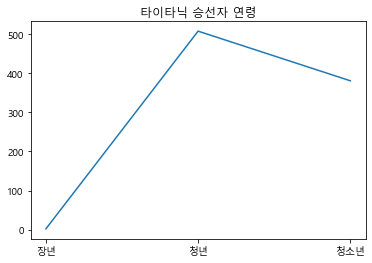

In [80]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title("타이타닉 승선자 연령")
plt.plot(u_age, cnt)
plt.show()